## 项目介绍

火力发电的基本原理是：燃料在燃烧时加热水生成蒸汽，蒸汽压力推动汽轮机旋转，然后汽轮机带动发电机旋转，产生电能。在这一系列的能量转化中，影响发电效率的核心是锅炉的燃烧效率，即燃料燃烧加热水产生高温高压蒸汽。锅炉的燃烧效率的影响因素很多，包括锅炉的可调参数，如燃烧给量，一二次风，引风，返料风，给水水量；以及锅炉的工况，比如锅炉床温、床压，炉膛温度、压力，过热器的温度等。

经脱敏后的锅炉传感器采集的数据（采集频率是分钟级别），根据锅炉的工况，预测产生的蒸汽量。

## 导入数据探索工具包

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
import warnings 
warnings.filterwarnings("ignore")

## 数据加载

In [4]:
train_data_file = "./zhengqi_train.txt" 
test_data_file = "./zhengqi_test.txt" 
train_data = pd.read_csv(train_data_file, sep='\t') 
test_data = pd.read_csv(test_data_file, sep='\t')

## 查看数据集变量信息

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

此训练集数据共有2888个样本，数据中有V0-V37共计38个特征变量，变量类型都为数值类型，所有数据特征没有缺失值数据； 数据字段由于采用了脱敏处理，删除了特征数据的具体含义；target字段为标签变量

测试集数据共有1925个样本，数据中有V0-V37共计38个特征变量，变量类型都为数值类型

## 查看数据统计信息

In [8]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


上面数据显示了数据的统计信息，例如样本数，数据的均值mean，标准差std，最小值，最大值等

## 查看数据字段信息

In [11]:
train_data.head(10)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384
5,0.445,0.627,0.408,0.220,0.458,-1.056,-1.009,-1.896,0.481,-2.114,...,0.454,0.674,0.358,0.618,-0.843,-0.290,0.364,-0.191,-0.883,0.060
6,0.889,0.416,0.640,0.356,0.224,-0.893,-0.812,-1.823,0.729,-2.114,...,0.454,0.081,0.243,0.468,-0.843,-0.290,0.364,-0.155,-1.318,0.415
7,0.984,0.529,0.704,0.438,0.258,-0.917,-0.682,-1.721,0.753,-2.114,...,0.139,-0.050,0.428,-0.119,-0.843,-0.290,0.364,0.100,-0.899,0.609
8,0.948,0.850,0.584,0.459,0.591,-0.523,-0.591,-1.524,0.763,-2.114,...,0.188,0.467,0.597,-0.057,-0.843,-0.290,0.364,0.053,-0.553,0.981
9,1.157,1.055,0.638,0.617,1.483,-0.731,-0.612,-1.524,0.968,-2.114,...,0.860,0.456,0.916,0.039,-0.843,-0.290,0.364,0.151,-1.157,0.818


## 箱式图数据探索

### 第一个特征箱式图

<AxesSubplot:xlabel='V0'>

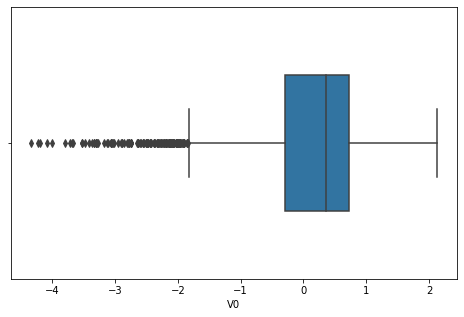

In [15]:
fig = plt.figure(figsize=(8, 5)) # 指定绘图对象宽度和高度 
sns.boxplot(train_data['V0'],orient="v", width=0.5)

### 全部特征箱式图

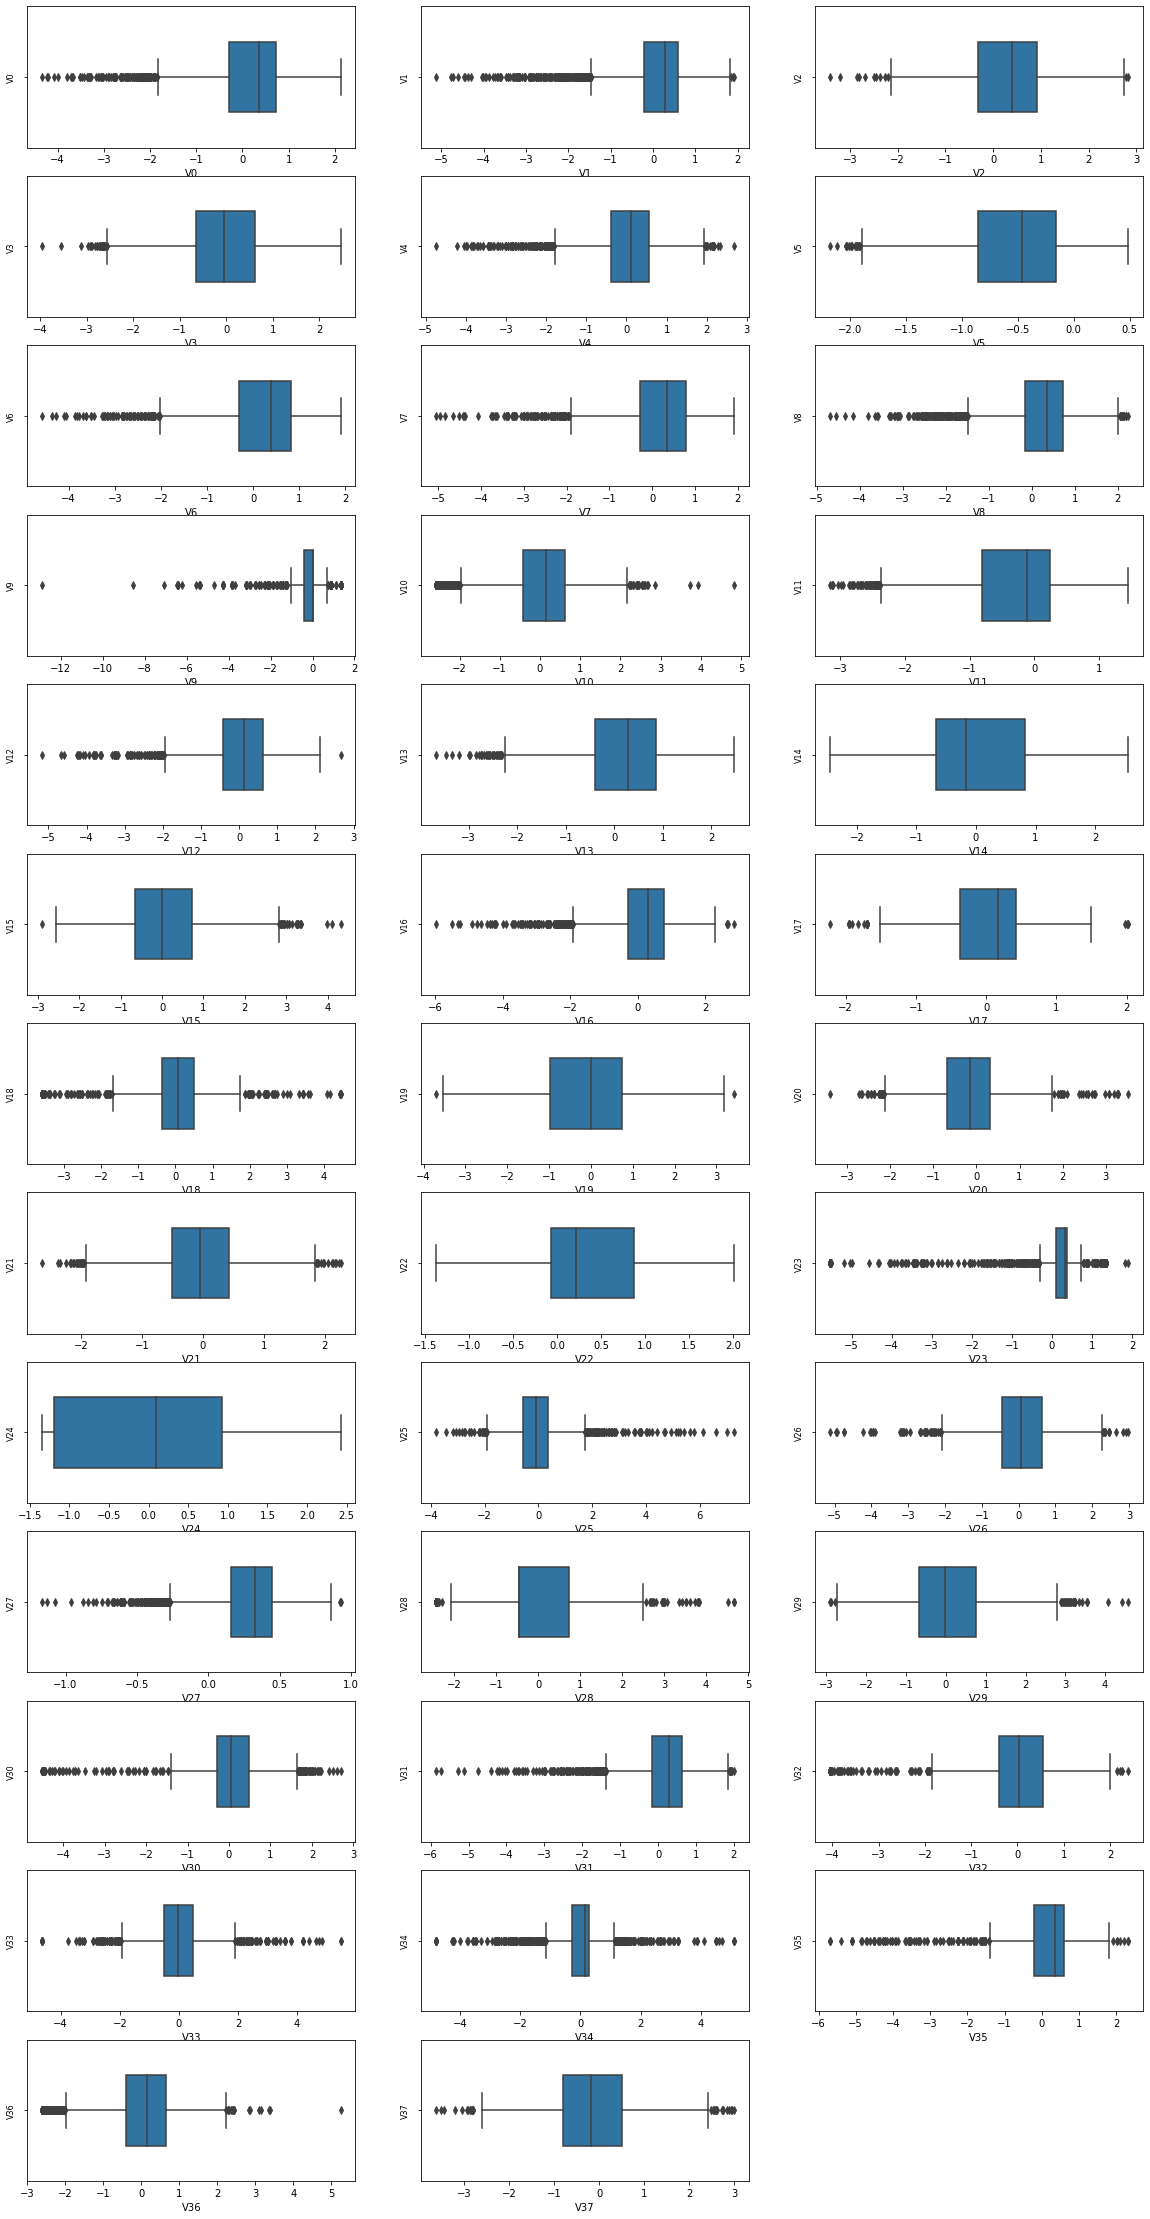

In [19]:
# 画箱式图 
column = train_data.columns.tolist()[:39] 
# 列表头 
fig = plt.figure(figsize=(20, 40)) # 指定绘图对象宽度和高度 
for i in range(38): 
    plt.subplot(13, 3, i + 1) # 13行3列子图 
    sns.boxplot(train_data[column[i]], orient="v", width=0.5) # 箱式图 
    plt.ylabel(column[i], fontsize=8) 
plt.show()

## 查看数据分布

### 对比同一特征变量‘V0’下，训练集数据和测试集数据的分布情况，查看数据分布是否一致

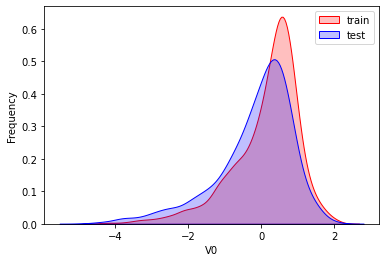

In [20]:
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True) 
ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True) 
ax.set_xlabel('V0') 
ax.set_ylabel("Frequency") 
ax = ax.legend(["train","test"])

### 查看所有特征变量下，训练集数据和测试集数据的分布情况，分析并寻找出数据分布不一致的特征变量。

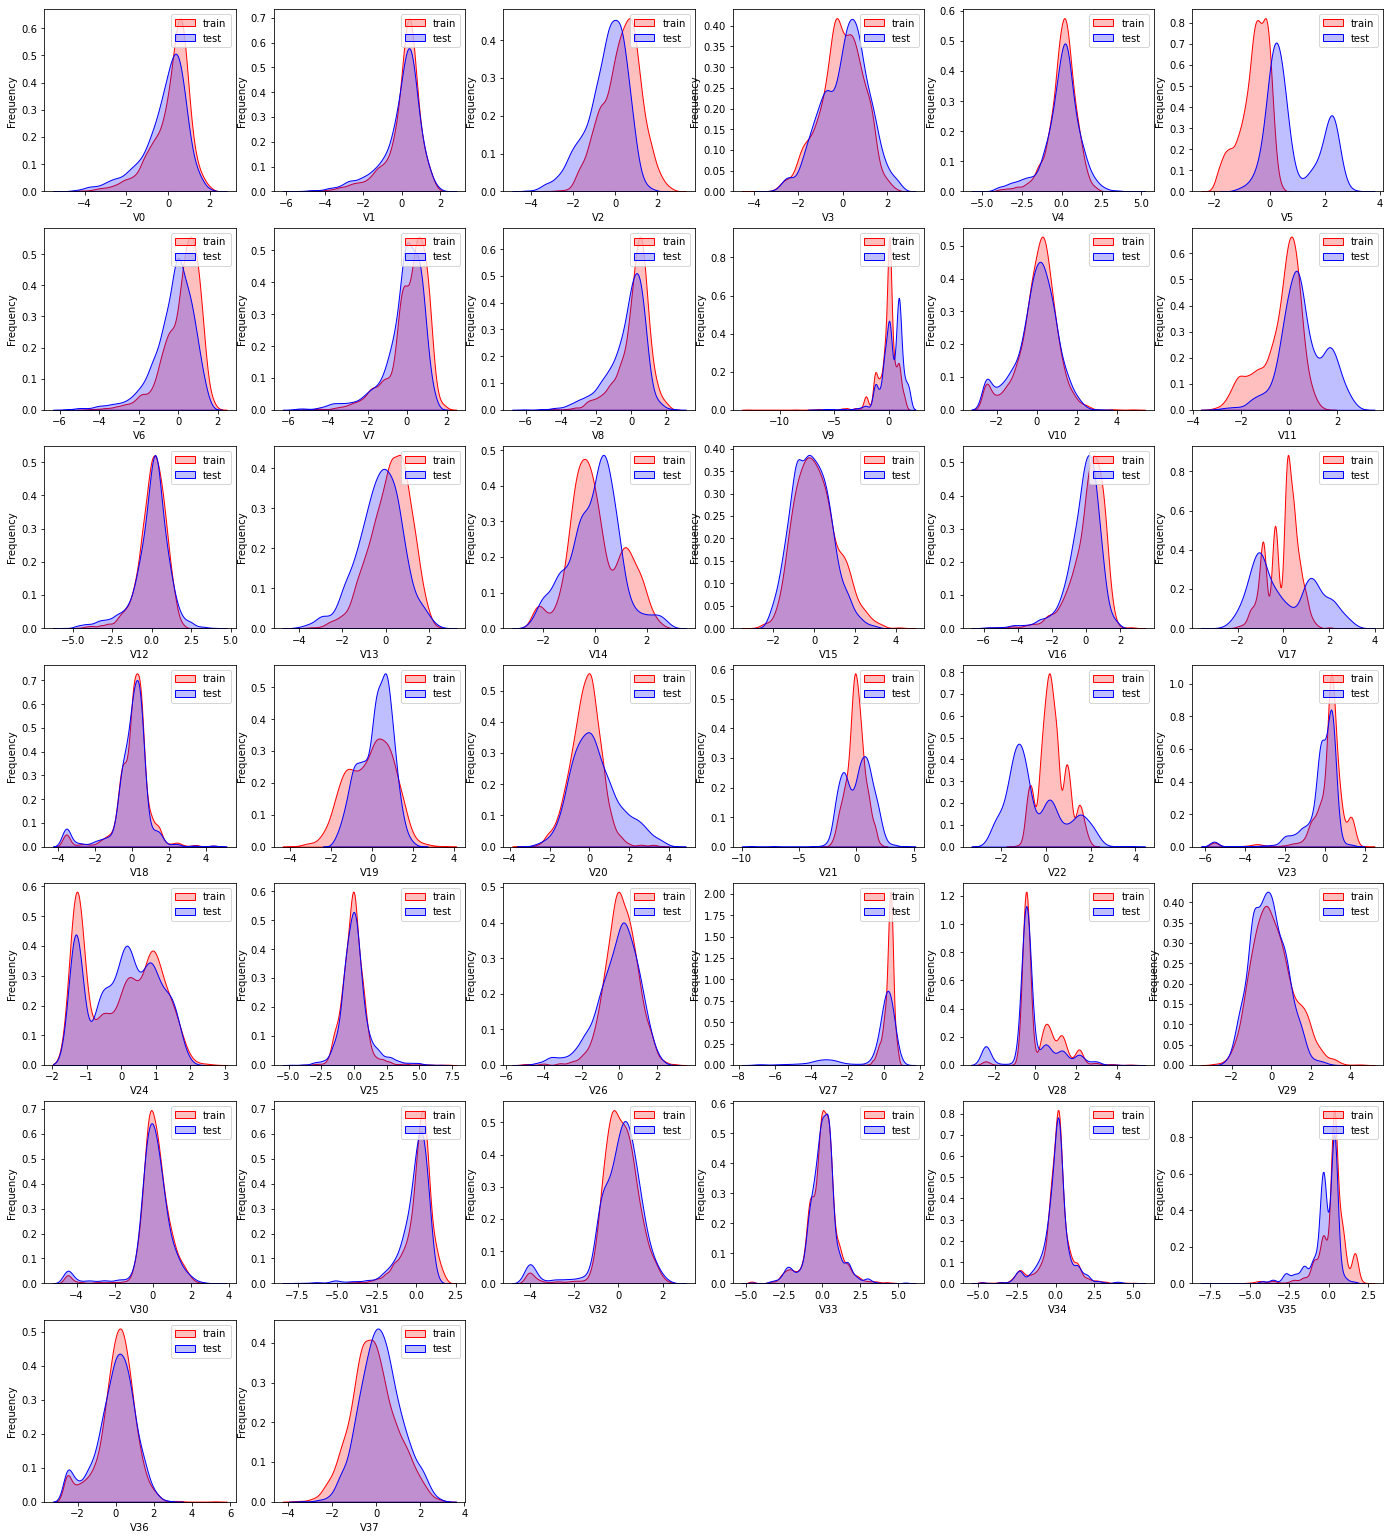

In [21]:
dist_cols = 6 
dist_rows = len(test_data.columns) 
plt.figure(figsize=(4*dist_cols,4*dist_rows)) 
i=1 
for col in test_data.columns: 
    ax=plt.subplot(dist_rows,dist_cols,i) 
    ax = sns.kdeplot(train_data[col], color="Red", shade=True) 
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True) 
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency") 
    ax = ax.legend(["train","test"]) 
    i+=1 
plt.show()

### 查看特征'V5', 'V17', 'V28', 'V22', 'V11', 'V9'数据的数据分布

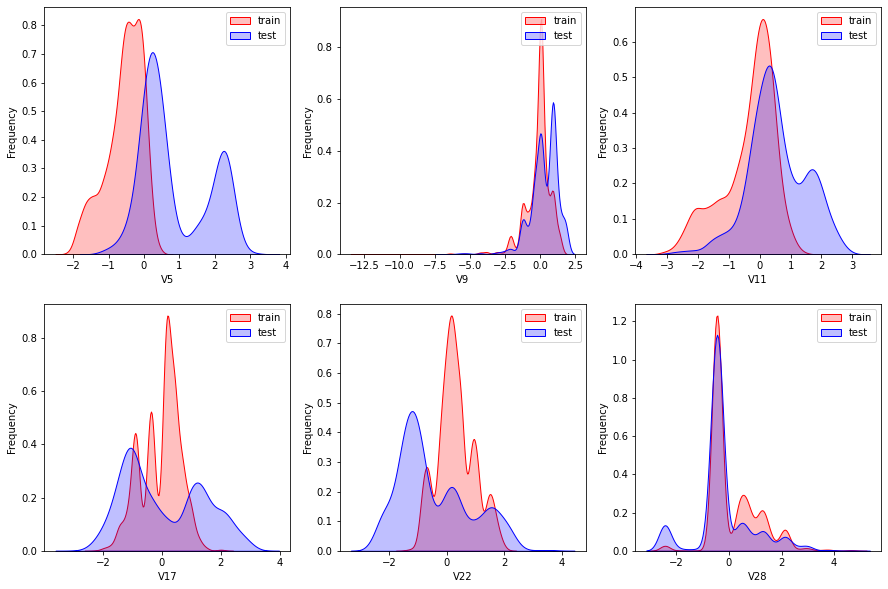

In [22]:
col = 3 
row = 2 
plt.figure(figsize=(5 * col,5 * row)) 
i=1 
for c in ["V5","V9","V11","V17","V22","V28"]: 
    ax = plt.subplot(row,col,i) 
    ax = sns.kdeplot(train_data[c], color="Red", shade=True) 
    ax = sns.kdeplot(test_data[c], color="Blue", shade=True) 
    ax.set_xlabel(c) 
    ax.set_ylabel("Frequency") 
    ax = ax.legend(["train","test"]) 
    i+=1

由上图的数据分布可以看到特征'V5','V9','V11','V17','V22','V28' 训练集数据与测试集数据分布不一致，会导致模型泛化能力差，删除此类特征。

## 特征相关性

### 特征变量相关性

In [23]:
drop_col_kde = ['V5','V9','V11','V17','V22','V28'] 
train_data_drop = train_data.drop(drop_col_kde, axis=1) 
train_corr = train_data_drop.corr() 
train_corr

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,0.189267,0.141294,0.794013,0.298443,0.751830,...,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,0.276805,0.205023,0.874650,0.310120,0.656186,...,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,0.615938,0.477114,0.703431,0.346006,0.059941,...,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,0.233896,0.197836,0.411946,0.321262,0.306397,...,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.117529,-0.052370,0.449542,0.141129,0.927685,...,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.100010,0.113609,-0.031054,0.603984
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,1.000000,0.917502,0.468233,0.415660,-0.087312,...,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.044992,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.917502,1.000000,0.389987,0.310982,-0.036791,...,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.111166,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,0.468233,0.389987,1.000000,0.419703,0.420557,...,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.179167,0.326586,-0.553121,0.831904
V10,0.298443,0.310120,0.346006,0.321262,0.141129,0.415660,0.310982,0.419703,1.000000,0.140462,...,-0.105042,-0.036705,0.560213,-0.093213,0.016739,-0.026994,0.026846,0.922190,-0.045851,0.394767
V12,0.751830,0.656186,0.059941,0.306397,0.927685,-0.087312,-0.036791,0.420557,0.140462,1.000000,...,0.666775,0.028866,0.441963,-0.007658,0.046674,0.010122,0.081963,0.112150,-0.054827,0.594189


### 绘制热力图

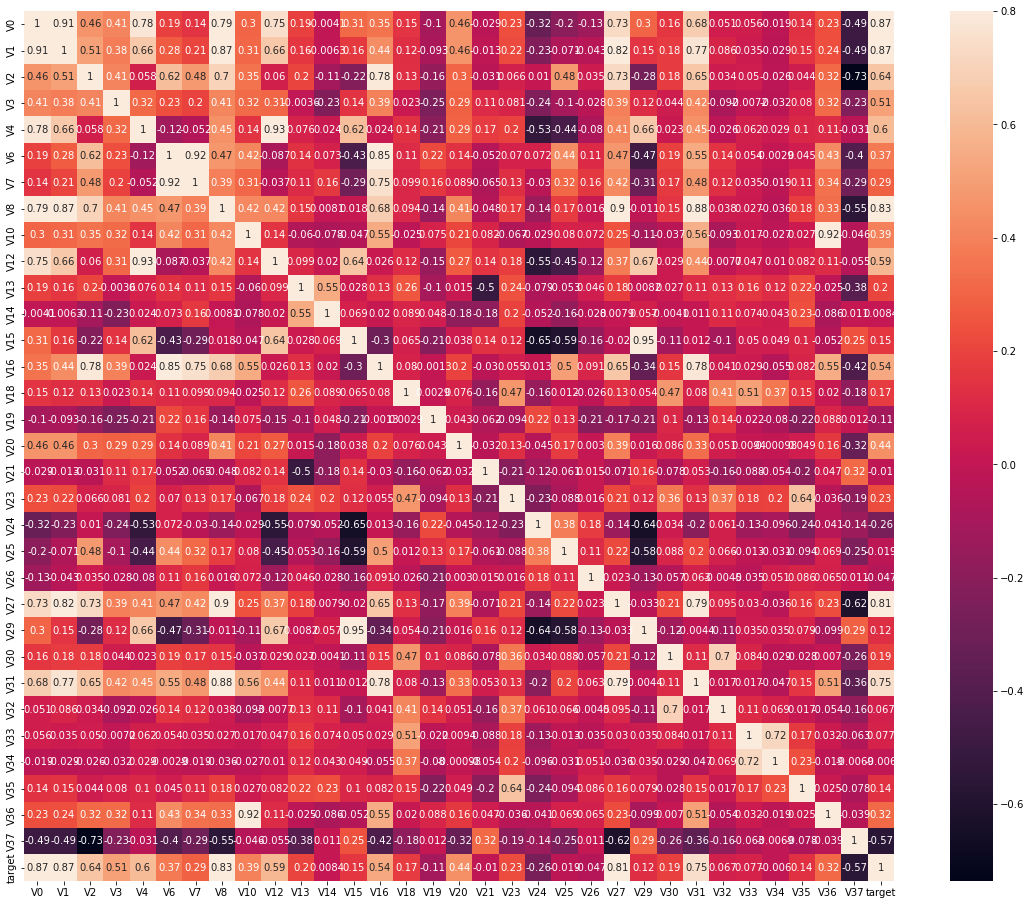

In [24]:
# 画出相关性热力图 
ax = plt.subplots(figsize=(20, 16))#调整画布大小 
# 画热力图 annot=True 显示系数 
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)

### 半热力图

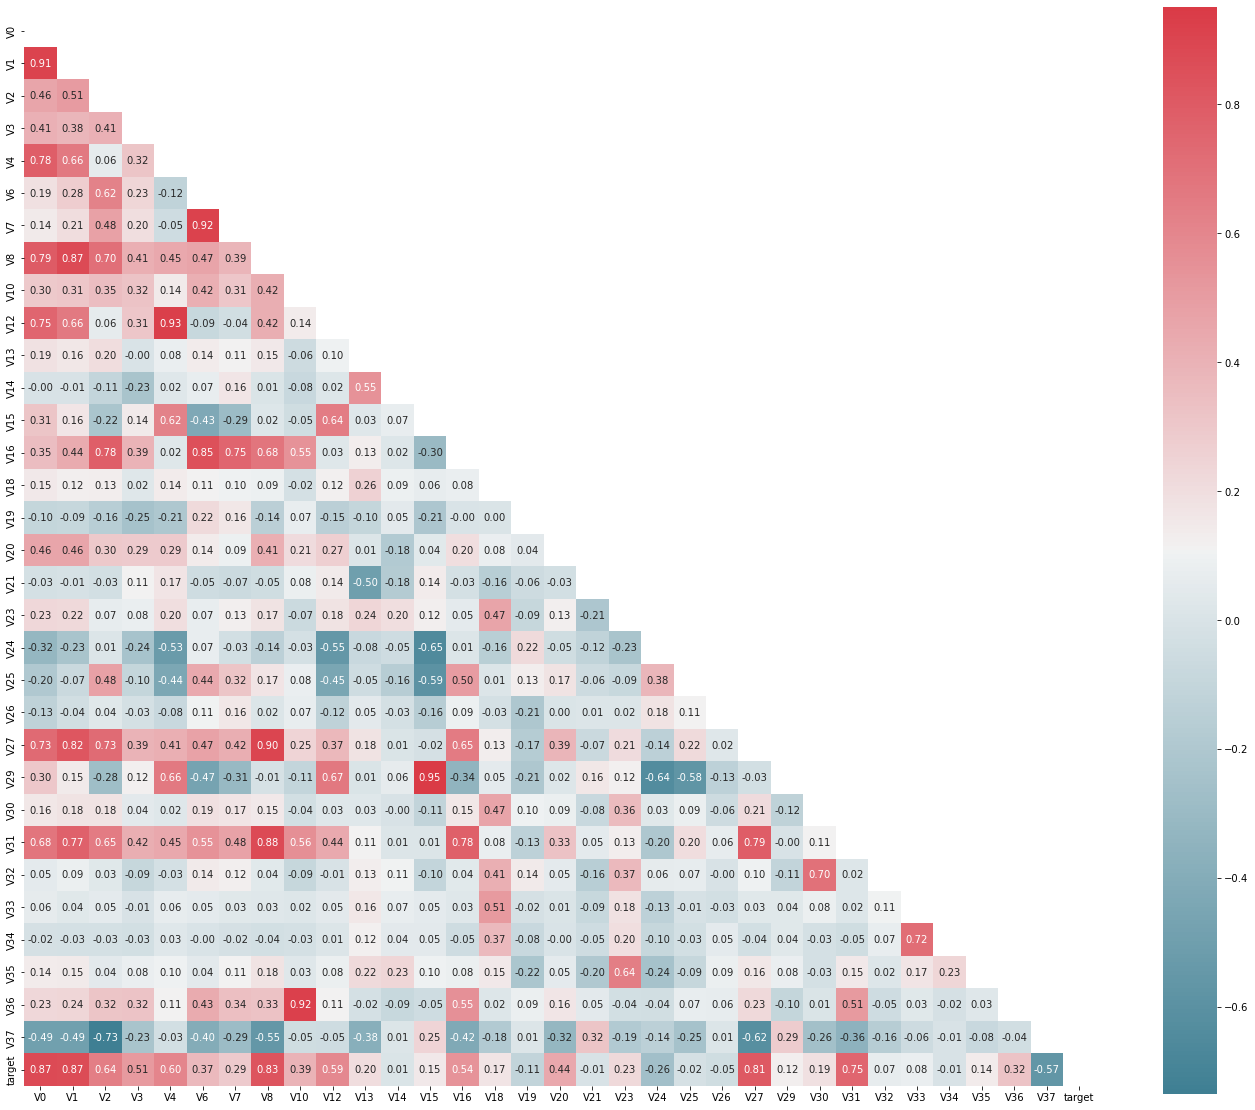

In [25]:
plt.figure(figsize=(24, 20))  # 指定绘图对象宽度和高度
colnm = train_data_drop.columns.tolist()  # 列表头
# 相关系数矩阵，即给出了任意两个变量之间的相关系数
mcorr = train_data_drop.corr()
# 构造与mcorr同维数矩阵 为bool型
mask = np.zeros_like(mcorr, dtype=np.bool)
# 角分线右侧为True
mask[np.triu_indices_from(mask)] = True
# 设置colormap对象，表示颜色
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# 热力图（看两两相似度）
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')

上图为所有特征变量和target变量两两之间的相关系数，由此可以看出各个特征变量V0-V37之间的相关性以及特征变量V0-V37与target的相关性。

## 特征筛选

### 根据数据分布进行特征删除

In [26]:
# 删除训练数据和预测数据 
train_data.drop(drop_col_kde,axis = 1,inplace=True) 
test_data.drop(drop_col_kde,axis = 1,inplace= True) 
train_data.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


### 根据相关系数进行特征删除

相关性系数：

0.8-1.0 极强相关；

0.6-0.8 强相关；

0.4-0.6 中等程度相关；

0.2-0.4 弱相关；

0.0-0.2 极弱相关或无相关（过滤极弱相关的特征）

过滤条件特征相关性系数：小于0.1

In [27]:
cond = mcorr['target'].abs() < 0.1 
drop_col_corr = mcorr.index[cond] 
display(drop_col_corr) 
train_data.drop(drop_col_corr,axis = 1,inplace=True) 
test_data.drop(drop_col_corr,axis = 1,inplace=True) 
display(train_data.head())

Index(['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'], dtype='object')

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V23,V24,V27,V29,V30,V31,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.356,0.800,0.168,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.357,0.801,0.338,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.355,0.961,0.326,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,0.352,1.435,0.277,0.015,0.417,0.279,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.352,0.881,0.332,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384


### 数据合并保存

In [29]:
train_data

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V24,V27,V29,V30,V31,V35,V36,V37,target,label
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.800,0.168,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.801,0.338,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.961,0.326,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,1.435,0.277,0.015,0.417,0.279,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.881,0.332,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,0.190,-0.025,-0.138,0.161,0.600,0.757,0.584,-0.026,0.355,0.436,...,-1.310,0.189,0.128,-0.208,0.809,-0.349,0.576,0.686,0.235,train
2884,0.507,0.557,0.296,0.183,0.530,0.749,0.584,0.537,-0.061,0.414,...,-1.314,0.372,0.291,-0.287,0.465,-0.349,-0.615,-0.380,1.042,train
2885,-0.394,-0.721,-0.485,0.084,0.136,0.655,0.614,-0.818,0.240,-0.185,...,-1.310,0.058,0.291,-0.179,0.268,-0.349,0.951,0.748,0.005,train
2886,-0.219,-0.282,-0.344,-0.049,0.449,0.560,0.583,-0.596,-0.395,-0.053,...,-1.313,0.133,0.216,1.061,-0.051,-0.230,-0.301,0.555,0.350,train


In [31]:
test_data

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V23,V24,V27,V29,V30,V31,V35,V36,V37,label
0,0.368,0.380,-0.225,-0.049,0.379,0.550,0.551,0.244,-0.419,0.346,...,0.098,-1.314,0.208,0.047,0.057,-0.042,-0.190,-0.567,0.388,test
1,0.148,0.489,-0.247,-0.049,0.122,0.487,0.493,-0.127,-0.403,0.465,...,0.090,-1.310,0.226,0.047,0.560,0.176,0.008,-0.294,0.104,test
2,-0.166,-0.062,-0.311,0.046,-0.055,0.485,0.493,-0.227,0.330,0.173,...,0.091,-1.310,0.084,-0.398,0.101,0.199,0.008,0.373,0.569,test
3,0.102,0.294,-0.259,0.051,-0.183,0.474,0.504,0.010,-0.431,-0.038,...,0.086,0.234,0.203,-0.398,1.007,0.137,0.008,-0.666,0.391,test
4,0.300,0.428,0.208,0.051,-0.033,0.408,0.497,0.155,-0.162,-0.063,...,0.089,0.237,0.227,-0.776,0.291,0.370,0.008,-0.140,-0.497,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,-1.362,-1.553,-3.096,-0.444,0.381,-4.854,-5.331,-4.074,-2.551,0.396,...,-1.538,-0.630,-1.674,0.171,-4.488,-5.793,-2.131,-2.564,0.597,test
1921,-2.698,-3.452,-3.620,-1.066,-1.385,-4.927,-5.103,-4.393,-2.525,-1.786,...,-1.479,-0.204,-1.773,1.297,-0.613,-7.698,-2.131,-2.564,1.215,test
1922,-2.615,-3.564,-3.402,-0.422,-1.272,-4.223,-4.315,-5.196,-2.529,-1.151,...,-1.085,1.057,-1.585,0.552,0.125,-6.111,-1.537,-2.544,1.612,test
1923,-2.661,-3.646,-3.271,-0.699,-1.270,-3.716,-3.809,-4.735,-2.560,-1.512,...,-1.084,0.800,-1.410,0.318,1.086,-5.268,-1.537,-2.549,1.431,test


In [32]:
train_data['label'] = 'train' 
test_data['label'] = 'test' 
all_data = pd.concat([train_data,test_data]) 
all_data.to_csv('./processed_zhengqi_data.csv',index=False) 
all_data.head()
all_data

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V24,V27,V29,V30,V31,V35,V36,V37,target,label
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.800,0.168,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.801,0.338,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.961,0.326,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,1.435,0.277,0.015,0.417,0.279,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.881,0.332,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,-1.362,-1.553,-3.096,-0.444,0.381,-4.854,-5.331,-4.074,-2.551,0.396,...,-0.630,-1.674,0.171,-4.488,-5.793,-2.131,-2.564,0.597,NaN,test
1921,-2.698,-3.452,-3.620,-1.066,-1.385,-4.927,-5.103,-4.393,-2.525,-1.786,...,-0.204,-1.773,1.297,-0.613,-7.698,-2.131,-2.564,1.215,NaN,test
1922,-2.615,-3.564,-3.402,-0.422,-1.272,-4.223,-4.315,-5.196,-2.529,-1.151,...,1.057,-1.585,0.552,0.125,-6.111,-1.537,-2.544,1.612,NaN,test
1923,-2.661,-3.646,-3.271,-0.699,-1.270,-3.716,-3.809,-4.735,-2.560,-1.512,...,0.800,-1.410,0.318,1.086,-5.268,-1.537,-2.549,1.431,NaN,test


In [33]:
2888 + 1925

4813